In [ ]:
#!pip install torch torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 71.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 36.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 103.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader


In [6]:
transform = transforms.Compose([transforms.ToTensor(),])
train_dataset=torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
train_loader=DataLoader(dataset=train_dataset,batch_size=64,shuffle=True,num_workers=2)


test_dataset=torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
test_loader=DataLoader(dataset=test_dataset,batch_size=64,shuffle=False,num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


In [7]:
class ColorizationNet(nn.Module):
    def __init__(self):
        super(ColorizationNet, self).__init__()
        self.conv1=nn.Conv2d(1,64,kernel_size=5,stride=1,padding=4,dilation=2)
        self.conv2=nn.Conv2d(64,64,kernel_size=5,stride=1,padding=4,dilation=2)
        self.conv3=nn.Conv2d(64,128,kernel_size=5,stride=1,padding=4,dilation=2)
        self.conv4=nn.Conv2d(128,3,kernel_size=5,stride=1,padding=4,dilation=2)

    def forward(self,x):
        x=nn.functional.relu(self.conv1(x))
        x=nn.functional.relu(self.conv2(x))
        x=nn.functional.relu(self.conv3(x))
        x=torch.sigmoid(self.conv4(x))
        return x

In [8]:
device=torch.device("cuda" if torch.cuda.is_available() else "cpu")
if torch.cuda.is_available():
    print("Using GPU for training")
else:
    print("Using CPU for training")

model=ColorizationNet().to(device)
criteria = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

def rgb_to_gray(img):
    return img.mean(dim=1, keepdim=True)


Using GPU for training


In [6]:
epochs=75
for epoch in range(epochs):
    for i, (images, _) in enumerate(train_loader):
        gray_images=rgb_to_gray(images).to(device)
        images=images.to(device)

        outputs=model(gray_images)
        loss=criteria(outputs, images)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')

print("Training complete.")

Epoch [1/75], Step [100/782], Loss: 0.0072
Epoch [1/75], Step [200/782], Loss: 0.0070
Epoch [1/75], Step [300/782], Loss: 0.0052
Epoch [1/75], Step [400/782], Loss: 0.0070
Epoch [1/75], Step [500/782], Loss: 0.0063
Epoch [1/75], Step [600/782], Loss: 0.0051
Epoch [1/75], Step [700/782], Loss: 0.0047
Epoch [2/75], Step [100/782], Loss: 0.0053
Epoch [2/75], Step [200/782], Loss: 0.0047
Epoch [2/75], Step [300/782], Loss: 0.0057
Epoch [2/75], Step [400/782], Loss: 0.0051
Epoch [2/75], Step [500/782], Loss: 0.0045
Epoch [2/75], Step [600/782], Loss: 0.0046
Epoch [2/75], Step [700/782], Loss: 0.0047
Epoch [3/75], Step [100/782], Loss: 0.0050
Epoch [3/75], Step [200/782], Loss: 0.0048
Epoch [3/75], Step [300/782], Loss: 0.0048
Epoch [3/75], Step [400/782], Loss: 0.0046
Epoch [3/75], Step [500/782], Loss: 0.0054
Epoch [3/75], Step [600/782], Loss: 0.0050
Epoch [3/75], Step [700/782], Loss: 0.0052
Epoch [4/75], Step [100/782], Loss: 0.0046
Epoch [4/75], Step [200/782], Loss: 0.0043
Epoch [4/75

In [9]:
def imshow(img):
  img=img/2 + 0.5
  npimg=img.numpy()
  if len(img.shape)==2:
    plt.imshow(npimg,cmap='gray')
  else:
    plt.imshow(np.transpose(npimg,(1,2,0)))

def visualize_all_three(original_images,grayscale_images,colorized_images,n=5):

  fig=plt.figure(figsize=(3*n,4))
  for i in range(n):
    ax=plt.subplot(1,3*n,3*i+1)
    imshow(original_images[i])
    ax.set_title("Original")
    ax.axis("off")

    ax=plt.subplot(1,3*n,3*i + 2)
    imshow(grayscale_images[i])
    ax.set_title("Grayscale")
    ax.axis("off")

    ax=plt.subplot(1,3*n,3*i + 3)
    imshow(colorized_images[i])
    ax.set_title("Colorized")
    ax.axis("off")

  plt.tight_layout()
  plt.show()

def torch_rgb_to_hsv(rgb):
  r,g,b=rgb[:,0,:,:],rgb[:,1,:,:],rgb[:,2,:,:]
  max_val, _=torch.max(rgb,dim=1)
  min_val,_=torch.min(rgb,dim=1)
  diff=max_val-min_val

  h = torch.zeros_like(r)
  mask=(max_val==r)&(g>=b)
  h[mask]=(g[mask]-b[mask])/diff[mask]
  mask=(max_val==r)&(g<b)
  h[mask]=(g[mask]-b[mask])/diff[mask] + 6.0
  mask=max_val==g
  h[mask]=(b[mask]-r[mask])/diff[mask] + 2.0
  mask=max_val==b
  h[mask]=(r[mask]-g[mask])/diff[mask] + 4.0
  h=h/6.0
  h[diff==0.0]=0.0

  s=torch.zeros_like(r)
  s[diff!=0.0]=diff[diff!=0.0]/max_val[diff!=0.0]

  v=max_val

  return torch.stack([h,s,v],dim=1)

In [10]:
def torch_hsv_to_rgb(hsv):
  h, s, v = hsv[:, 0, :, :], hsv[:, 1, :, :], hsv[:, 2, :, :]
  i = (h * 6.0).floor()
  f = h * 6.0 - i
  p = v * (1.0 - s)
  q = v * (1.0 - s * f)
  t = v * (1.0 - s * (1.0 - f))

  i_mod = i % 6
  r = torch.zeros_like(h)
  g = torch.zeros_like(h)
  b = torch.zeros_like(h)

  r[i_mod == 0.0] = v[i_mod == 0.0]
  g[i_mod == 0.0] = t[i_mod == 0.0]
  b[i_mod == 0.0] = p[i_mod == 0.0]

  r[i_mod == 1.0] = q[i_mod == 1.0]
  g[i_mod == 1.0] = v[i_mod == 1.0]
  b[i_mod == 1.0] = p[i_mod == 1.0]

  r[i_mod == 2.0] = p[i_mod == 2.0]
  g[i_mod == 2.0] = v[i_mod == 2.0]
  b[i_mod == 2.0] = t[i_mod == 2.0]

  r[i_mod == 3.0] = p[i_mod == 3.0]
  g[i_mod == 3.0] = q[i_mod == 3.0]
  b[i_mod == 3.0] = v[i_mod == 3.0]

  r[i_mod == 4.0] = t[i_mod == 4.0]
  g[i_mod == 4.0] = p[i_mod == 4.0]
  b[i_mod == 4.0] = v[i_mod == 4.0]

  r[i_mod == 5.0] = v[i_mod == 5.0]
  g[i_mod == 5.0] = p[i_mod == 5.0]
  b[i_mod == 5.0] = q[i_mod == 5.0]

  return torch.stack([r, g, b], dim=1)

def exaggerate_colors(images,saturation_factor=1.5,value_factor=1.2):
  images=images.clone()

  images_hsv=torch_rgb_to_hsv(images)

  images_hsv[:,1,:,:]=torch.clamp(images_hsv[:,1,:,:]*saturation_factor,0,1)
  images_hsv[:,2,:,:]=torch.clamp(images_hsv[:,2,:,:]*value_factor,0,1)

  color_exaggerated_images=torch_hsv_to_rgb(images_hsv)

  return color_exaggerated_images

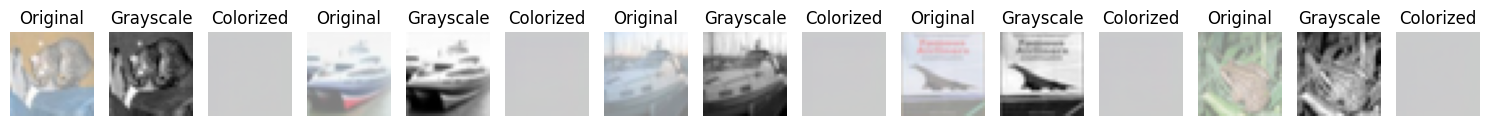

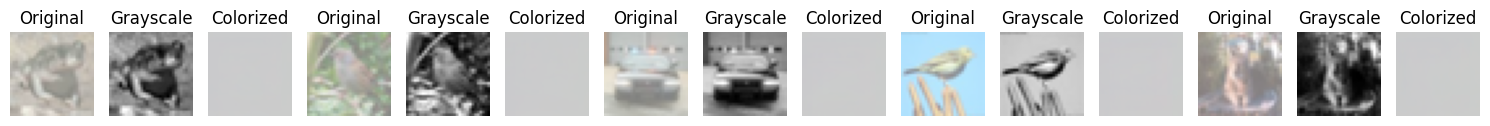

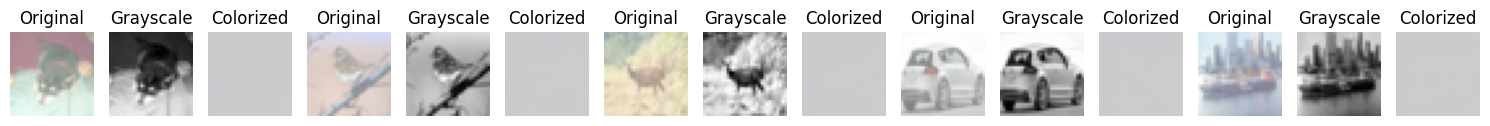

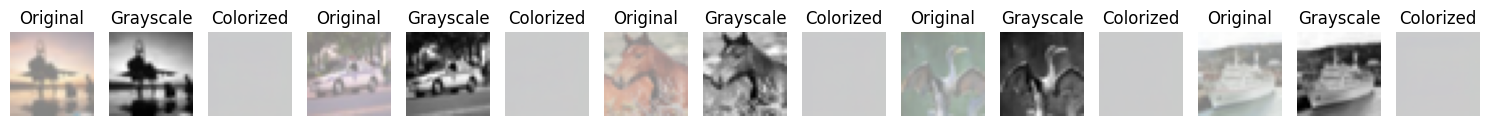

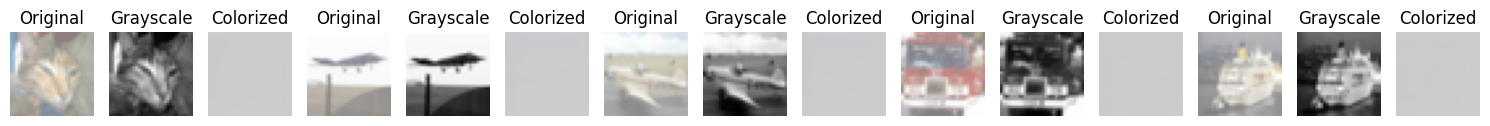

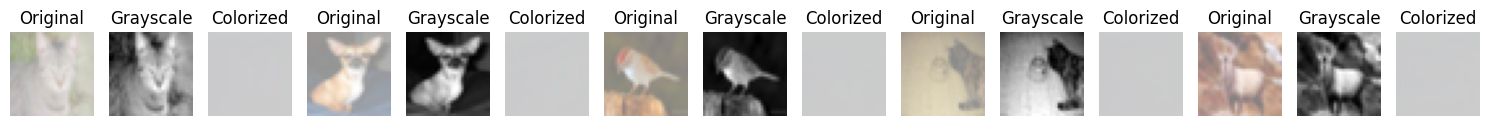

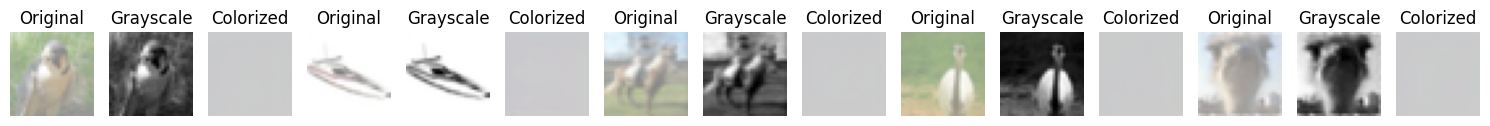

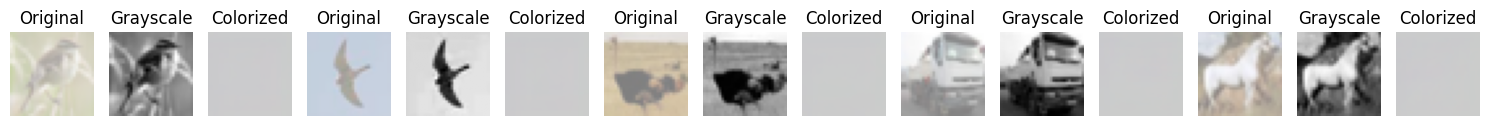

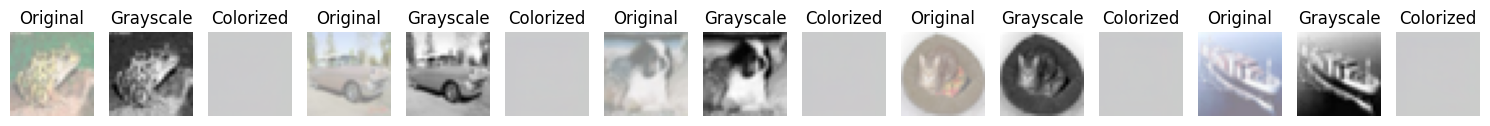

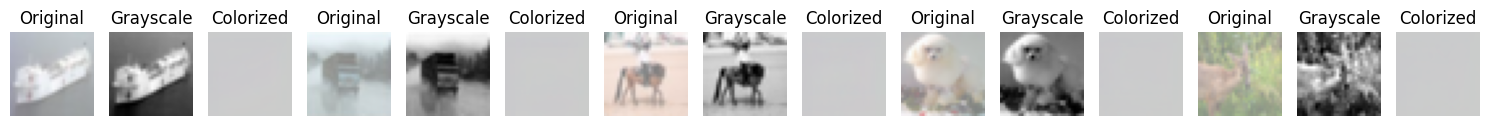

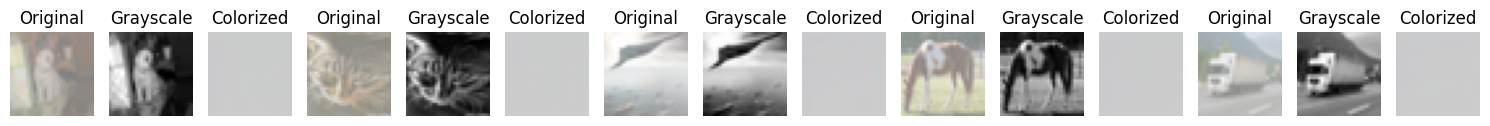

In [11]:
with torch.no_grad():
  for i,(images,_) in enumerate(test_loader):
    grayscale_images=rgb_to_gray(images).to(device)
    colorized_images=model(grayscale_images)

    grayscale_images_cpu = grayscale_images.cpu().squeeze(1)
    colorized_images_cpu = colorized_images.cpu()
    original_images_cpu = images.cpu()

    colorized_images_cpu=exaggerate_colors(colorized_images_cpu)

    visualize_all_three(original_images_cpu,grayscale_images_cpu,colorized_images_cpu)

    if i==10:
      break



In [10]:
# prompt: save the trained model

torch.save(model.state_dict(), 'colorization_model.pth')

In [12]:
import os 

current_directory = os.getcwd()
print("Current working directory:", current_directory)
files=os.listdir(current_directory)
print("Files in the current directory:", files)


Current working directory: c:\Users\Amit Singh\Documents\Projects\nullClass_training-main
Files in the current directory: ['.venv', 'colorization_model.pth', 'data', 'eiffeltower.jpeg', 'main.ipynb']


In [13]:
from PIL import Image

img = Image.open('eiffeltower.jpeg')
gray_img= img.convert('L')

In [15]:
transform=transforms.Compose([transforms.Compose([transforms.ToTensor()])])
img_tensor=transform(gray_img).unsqueeze(0).to(device)
model=ColorizationNet().to(device)
model.load_state_dict(torch.load('colorization_model.pth'))
model.eval()

C:\Users\Amit Singh\AppData\Local\Temp\ipykernel_17184\3232742642.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('colorization_model.pt

ColorizationNet(
  (conv1): Conv2d(1, 64, kernel_size=(5, 5), stride=(1, 1), padding=(4, 4), dilation=(2, 2))
  (conv2): Conv2d(64, 64, kernel_size=(5, 5), stride=(1, 1), padding=(4, 4), dilation=(2, 2))
  (conv3): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1), padding=(4, 4), dilation=(2, 2))
  (conv4): Conv2d(128, 3, kernel_size=(5, 5), stride=(1, 1), padding=(4, 4), dilation=(2, 2))
)

In [17]:
with torch.no_grad():
    colorized_tensor=model(img_tensor)

In [18]:
colorized_img=transforms.ToPILImage()(colorized_tensor.squeeze(0).cpu())
colorized_img.save('colorized_eiffeltower.jpeg')

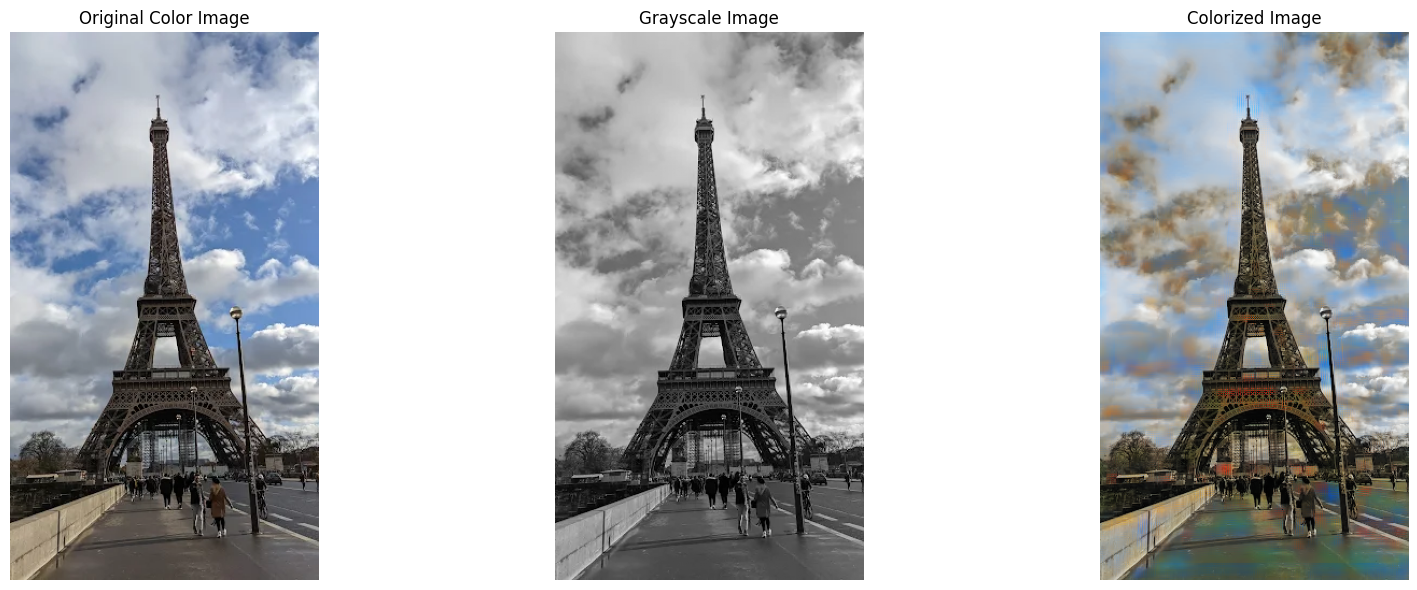

In [20]:
fig,ax=plt.subplots(1,3, figsize=(18,6))

ax[0].imshow(img)
ax[0].set_title("Original Color Image")
ax[0].axis("off")

ax[1].imshow(gray_img, cmap='gray')
ax[1].set_title("Grayscale Image")
ax[1].axis("off")

ax[2].imshow(colorized_img)
ax[2].set_title("Colorized Image")
ax[2].axis("off")
plt.tight_layout()
plt.show()

In [21]:
gray_img.save('eiffeltower_gray.jpeg')